**sauvola vs niblack**

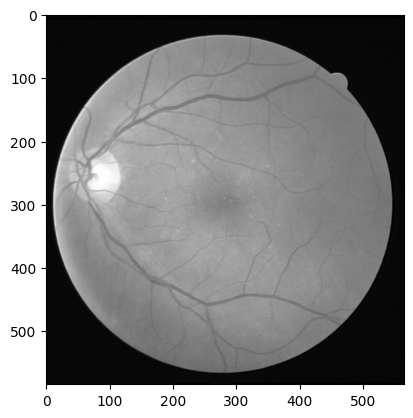

In [69]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os


def sauvola(img, win=25, k=0.08, R=25):
    img = img.astype(np.float32)
    
    mean = cv2.boxFilter(img, cv2.CV_32F, (win, win))
    mean_sq = cv2.boxFilter(img*img, cv2.CV_32F, (win, win))
    
    std = np.sqrt(mean_sq - mean*mean)
    T = mean * (1 + k * (std / R - 1))
    
    return ((img < T) * 255).astype(np.uint8)


def niblack(img, win=40, k=-1.3):
    img = img.astype(np.float32)
    r = win // 2

    mean = cv2.boxFilter(img, cv2.CV_32F, (win, win))
    mean_s = cv2.boxFilter(img*img, cv2.CV_32F, (win, win))

    std = np.sqrt(mean_s - mean*mean)
    T = mean + k*std

    return ((img < T) * 255).astype(np.uint8)

path = '/kaggle/input/datasets/andrewmvd/drive-digital-retinal-images-for-vessel-extraction/DRIVE/training/images/21_training.tif'
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap='gray')
plt.show()

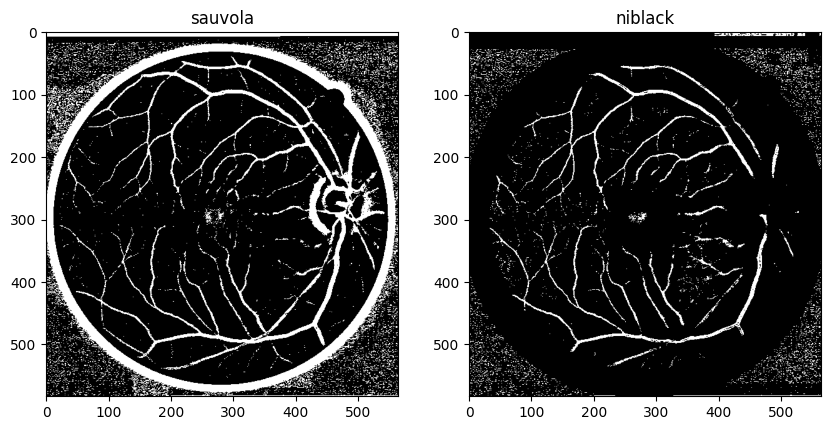

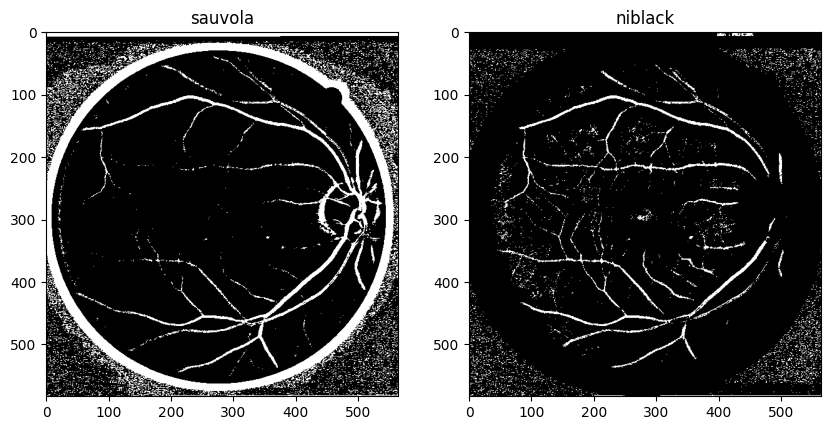

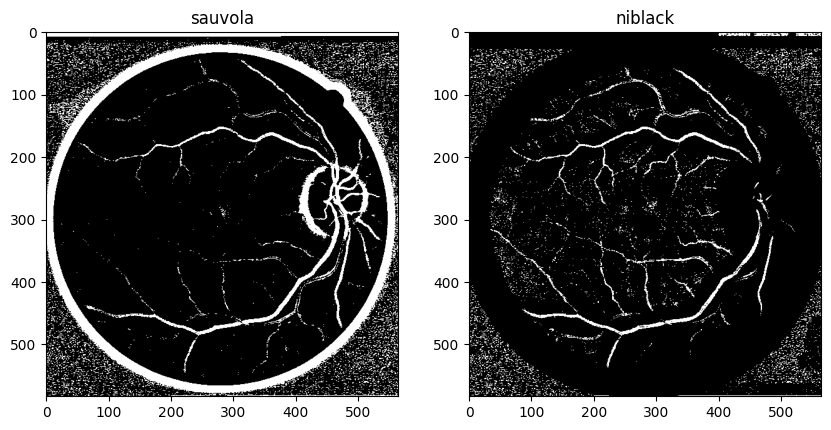

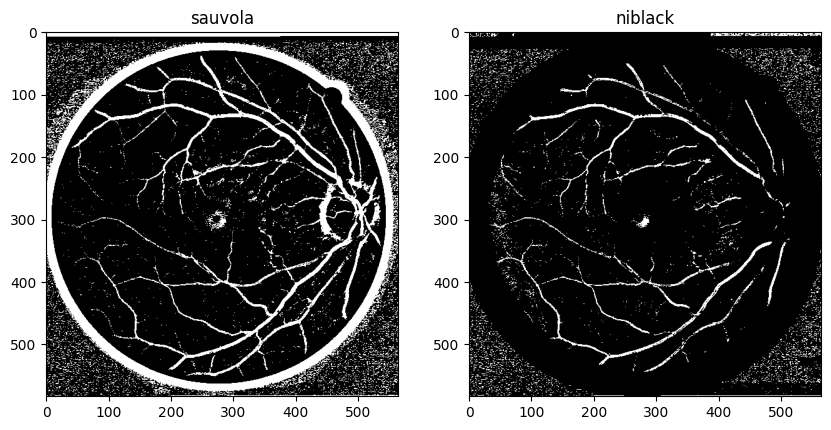

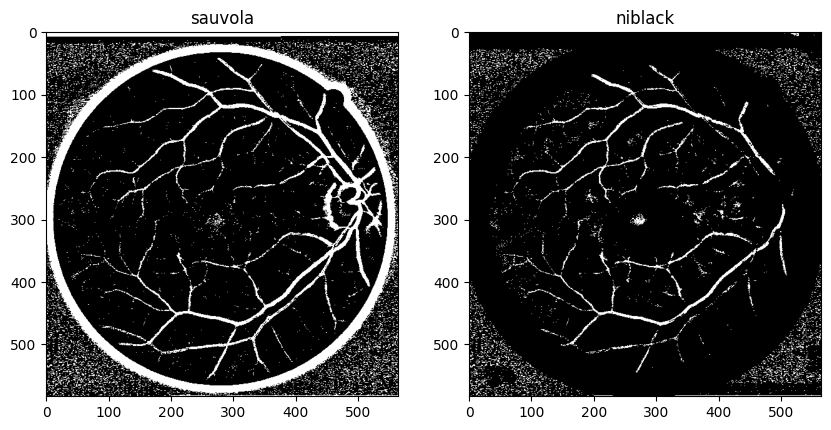

sauvola dice:  0.5598558971737754
niblack dice:  0.4855931369858612


In [71]:
dices1=[]
dices2=[]

def circle_mask(shape):
    radius = int(0.95 * min(img.shape) // 2)
    h, w = shape
    cy, cx = h // 2, w // 2

    Y, X = np.ogrid[:h, :w]
    dist2 = (X - cx)**2 + (Y - cy)**2

    mask = dist2 <= radius**2
    return mask.astype(np.uint8)



def dice(pred, gt): #comparing dice score inside the circle
    pred = (pred > 0).astype(np.uint8)
    gt = (gt > 0).astype(np.uint8)

    
    mask = circle_mask(img.shape)
    pred = pred * mask
    gt   = gt * mask

    intersection = np.sum(pred * gt)
    union = np.sum(pred) + np.sum(gt)

    if union == 0:
        return 1.0  # both empty

    return 2.0 * intersection / union


img_dir = '/kaggle/input/datasets/andrewmvd/drive-digital-retinal-images-for-vessel-extraction/DRIVE/training/images'
mask_dir = '/kaggle/input/datasets/andrewmvd/drive-digital-retinal-images-for-vessel-extraction/DRIVE/training/1st_manual'

for fname in os.listdir(img_dir)[10:15]:
    path = os.path.join(img_dir, fname)
    path2 = os.path.join(mask_dir, fname.replace('_training.tif', '_manual1.gif'))
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    mask = cv2.imread(path2, cv2.IMREAD_GRAYSCALE)
    if img is not None and mask is not None:
        m1 = sauvola(img)
        m2 = niblack(img)
        dices1.append(dice(m1,mask))
        dices2.append(dice(m2,mask))
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        axes[0].imshow(m1,cmap='gray')
        axes[0].set_title('sauvola')
        axes[1].imshow(m2, cmap='gray')
        axes[1].set_title('niblack')
        plt.show()


print('sauvola dice: ',np.mean(dices1))
print('niblack dice: ',np.mean(dices2))